In [84]:
# Tutorial 1

import pandas as pd
import numpy as np



In [228]:
pd.set_option('display.max_rows', None) 
dataset = pd.read_csv(r'C:\Users\mtsil\OneDrive\Documents\file.csv', sep = ';')  
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [87]:
dataset.shape

(1460, 81)

In [88]:
dataset.dropna(axis=1, thresh = 700, inplace = True)
dataset.shape

(1460, 76)

In [89]:
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 

In [90]:
num_cols = dataset.select_dtypes(exclude=['object']).columns.tolist() #get the columns with the numerical data
cat_cols = dataset.select_dtypes(include=['object']).columns.tolist() #get the columns with the categorical data

In [91]:
num_pipeline = make_pipeline(
    SimpleImputer(strategy = 'median'),
     
)


cat_pipeline = make_pipeline(
    SimpleImputer(missing_values = np.nan, strategy='most_frequent'),
    OneHotEncoder(drop = 'if_binary', max_categories = 4, handle_unknown='ignore',sparse=False)
)

In [92]:
combined_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
], remainder = 'passthrough')

In [93]:
transformed_dataset = combined_pipeline.fit_transform(dataset) 

c:\users\mtsil\appdata\local\programs\python\python39\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [94]:
feature_names = combined_pipeline.get_feature_names_out() 

In [95]:
pd.set_option('display.max_columns', None) 
final_dataset = pd.DataFrame(transformed_dataset, columns = feature_names)
final_dataset.head()

,num__Id,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,num__1stFlrSF,num__2ndFlrSF,num__LowQualFinSF,num__GrLivArea,num__BsmtFullBath,num__BsmtHalfBath,num__FullBath,num__HalfBath,num__BedroomAbvGr,num__KitchenAbvGr,num__TotRmsAbvGrd,num__Fireplaces,num__GarageYrBlt,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea,num__MiscVal,num__MoSold,num__YrSold,num__SalePrice,cat__MSZoning_FV,cat__MSZoning_RL,cat__MSZoning_RM,cat__MSZoning_infrequent_sklearn,cat__Street_Pave,cat__LotShape_IR1,cat__LotShape_IR2,cat__LotShape_Reg,cat__LotShape_infrequent_sklearn,cat__LandContour_Bnk,cat__LandContour_HLS,cat__LandContour_Lvl,cat__LandContour_infrequent_sklearn,cat__Utilities_NoSeWa,cat__LotConfig_Corner,cat__LotConfig_CulDSac,cat__LotConfig_Inside,cat__LotConfig_infrequent_sklearn,cat__LandSlope_Gtl,cat__LandSlope_Mod,cat__LandSlope_Sev,cat__Neighborhood_CollgCr,cat__Neighborhood_NAmes,cat__Neighborhood_OldTown,cat__Neighborhood_infrequent_sklearn,cat__Condition1_Artery,cat__Condition1_Feedr,cat__Condition1_Norm,cat__Condition1_infrequent_sklearn,cat__Condition2_Feedr,cat__Condition2_Norm,cat__Condition2_RRNn,cat__Condition2_infrequent_sklearn,cat__BldgType_1Fam,cat__BldgType_Duplex,cat__BldgType_TwnhsE,cat__BldgType_infrequent_sklearn,cat__HouseStyle_1.5Fin,cat__HouseStyle_1Story,cat__HouseStyle_2Story,cat__HouseStyle_infrequent_sklearn,cat__RoofStyle_Flat,cat__RoofStyle_Gable,cat__RoofStyle_Hip,cat__RoofStyle_infrequent_sklearn,cat__RoofMatl_CompShg,cat__RoofMatl_Tar&Grv,cat__RoofMatl_WdShngl,cat__RoofMatl_infrequent_sklearn,cat__Exterior1st_HdBoard,cat__Exterior1st_MetalSd,cat__Exterior1st_VinylSd,cat__Exterior1st_infrequent_sklearn,cat__Exterior2nd_HdBoard,cat__Exterior2nd_MetalSd,cat__Exterior2nd_VinylSd,cat__Exterior2nd_infrequent_sklearn,cat__ExterQual_Ex,cat__ExterQual_Gd,cat__ExterQual_TA,cat__ExterQual_infrequent_sklearn,cat__ExterCond_Fa,cat__ExterCond_Gd,cat__ExterCond_TA,cat__ExterCond_infrequent_sklearn,cat__Foundation_BrkTil,cat__Foundation_CBlock,cat__Foundation_PConc,cat__Foundation_infrequent_sklearn,cat__BsmtQual_Ex,cat__BsmtQual_Gd,cat__BsmtQual_TA,cat__BsmtQual_infrequent_sklearn,cat__BsmtCond_Fa,cat__BsmtCond_Gd,cat__BsmtCond_TA,cat__BsmtCond_infrequent_sklearn,cat__BsmtExposure_Av,cat__BsmtExposure_Gd,cat__BsmtExposure_No,cat__BsmtExposure_infrequent_sklearn,cat__BsmtFinType1_ALQ,cat__BsmtFinType1_GLQ,cat__BsmtFinType1_Unf,cat__BsmtFinType1_infrequent_sklearn,cat__BsmtFinType2_LwQ,cat__BsmtFinType2_Rec,cat__BsmtFinType2_Unf,cat__BsmtFinType2_infrequent_sklearn,cat__Heating_GasA,cat__Heating_GasW,cat__Heating_Grav,cat__Heating_infrequent_sklearn,cat__HeatingQC_Ex,cat__HeatingQC_Gd,cat__HeatingQC_TA,cat__HeatingQC_infrequent_sklearn,cat__CentralAir_Y,cat__Electrical_FuseA,cat__Electrical_FuseF,cat__Electrical_SBrkr,cat__Electrical_infrequent_sklearn,cat__KitchenQual_Ex,cat__KitchenQual_Gd,cat__KitchenQual_TA,cat__KitchenQual_infrequent_sklearn,cat__Functional_Min1,cat__Functional_Min2,cat__Functional_Typ,cat__Functional_infrequent_sklearn,cat__FireplaceQu_Fa,cat__FireplaceQu_Gd,cat__FireplaceQu_TA,cat__FireplaceQu_infrequent_sklearn,cat__GarageType_Attchd,cat__GarageType_BuiltIn,cat__GarageType_Detchd,cat__GarageType_infrequent_sklearn,cat__GarageFinish_Fin,cat__GarageFinish_RFn,cat__GarageFinish_Unf,cat__GarageQual_Fa,cat__GarageQual_Gd,cat__GarageQual_TA,cat__GarageQual_infrequent_sklearn,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_TA,cat__GarageCond_infrequent_sklearn,cat__PavedDrive_N,cat__PavedDrive_P,cat__PavedDrive_Y,cat__SaleType_COD,cat__SaleType_New,cat__SaleType_WD,cat__SaleType_infrequent_sklearn,cat__SaleCondition_Abnorml,cat__SaleCondition_Normal,cat__SaleCondition_Partial,cat__SaleCondition_infrequent_sklearn
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,15

In [230]:
X = final_dataset[['num__GrLivArea', 'cat__Street_Pave']]

In [98]:
corr = X.corr(method='pearson')
corr.round(2)

,num__GrLivArea,cat__Street_Pave
num__GrLivArea,1.00,0.04
cat__Street_Pave,0.04,1.00


Text(0.5, 1.0, 'Correlation Matrix')

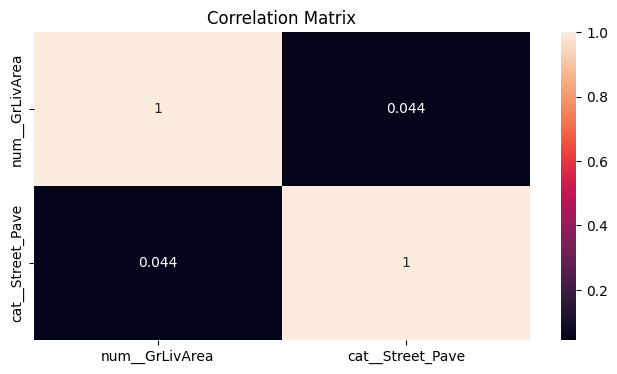

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

sns.heatmap(corr, annot=True)


plt.title('Correlation Matrix')

In [101]:
X = final_dataset[['num__GrLivArea', 'cat__Street_Pave']]
y = final_dataset['num__SalePrice']

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [104]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  12123.637726993067
Coefficient:  [  104.20180392 10040.8644301 ]


In [105]:
y_pred_model= model.predict(X_test)

In [106]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
1436,120500.0,112194.860744
57,196500.0,201391.604900
780,176000.0,152729.362469
382,213500.0,209415.143802
1170,171000.0,138662.118940


In [107]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.59647681293143


In [253]:
# Tutorial 2

X1 = final_dataset[['num__GrLivArea', 'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea']]

y = final_dataset['num__SalePrice']

In [254]:
corr = X1.corr(method='pearson')
corr.round(2)

,num__GrLivArea,num__GarageYrBlt,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea
num__GrLivArea,1.00,0.22,0.47,0.47,0.25,0.33,0.01,0.02,0.10,0.17
num__GarageYrBlt,0.22,1.00,0.47,0.47,0.22,0.22,-0.28,0.02,-0.08,-0.01
num__GarageCars,0.47,0.47,1.00,0.88,0.23,0.21,-0.15,0.04,0.05,0.02
num__GarageArea,0.47,0.47,0.88,1.00,0.22,0.24,-0.12,0.04,0.05,0.06
num__WoodDeckSF,0.25,0.22,0.23,0.22,1.00,0.06,-0.13,-0.03,-0.07,0.07
num__OpenPorchSF,0.33,0.22,0.21,0.24,0.06,1.00,-0.09,-0.01,0.07,0.06
num__EnclosedPorch,0.01,-0.28,-0.15,-0.12,-0.13,-0.09,1.00,-0.04,-0.08,0.05
num__3SsnPorch,0.02,0.02,0.04,0.04,-0.03,-0.01,-0.04,1.00,-0.03,-0.01
num__ScreenPorch,0.10,-0.08,0.05,0.05,-0.07,0.07,-0.08,-0.03,1.00,0.05
num__PoolArea,0.17,-0.01,0.02,0.06,0.07,0.06,0.05,-0.01,0.05,1.00


Text(0.5, 1.0, 'Correlation Matrix')

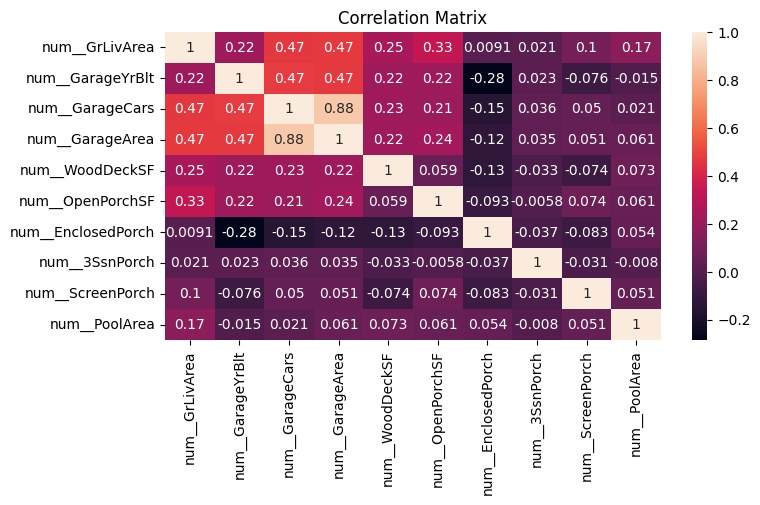

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

sns.heatmap(corr, annot=True)


plt.title('Correlation Matrix')

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [257]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [258]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)

Intercept:  12123.637726993067
Coefficient:  [  104.20180392 10040.8644301 ]


In [259]:
y_pred_model= model.predict(X_test)

In [260]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_model})
model_diff.head()

,Actual value,Predicted value
1436,120500.0,112194.860744
57,196500.0,201391.604900
780,176000.0,152729.362469
382,213500.0,209415.143802
1170,171000.0,138662.118940


In [261]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.59647681293143


In [262]:
#Tutorial 3

X1 = final_dataset[['num__GrLivArea', 'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea']]
y = final_dataset['num__SalePrice']

In [263]:
corr = X1.corr(method='pearson')
corr.round(2)

,num__GrLivArea,num__GarageYrBlt,num__GarageCars,num__GarageArea,num__WoodDeckSF,num__OpenPorchSF,num__EnclosedPorch,num__3SsnPorch,num__ScreenPorch,num__PoolArea
num__GrLivArea,1.00,0.22,0.47,0.47,0.25,0.33,0.01,0.02,0.10,0.17
num__GarageYrBlt,0.22,1.00,0.47,0.47,0.22,0.22,-0.28,0.02,-0.08,-0.01
num__GarageCars,0.47,0.47,1.00,0.88,0.23,0.21,-0.15,0.04,0.05,0.02
num__GarageArea,0.47,0.47,0.88,1.00,0.22,0.24,-0.12,0.04,0.05,0.06
num__WoodDeckSF,0.25,0.22,0.23,0.22,1.00,0.06,-0.13,-0.03,-0.07,0.07
num__OpenPorchSF,0.33,0.22,0.21,0.24,0.06,1.00,-0.09,-0.01,0.07,0.06
num__EnclosedPorch,0.01,-0.28,-0.15,-0.12,-0.13,-0.09,1.00,-0.04,-0.08,0.05
num__3SsnPorch,0.02,0.02,0.04,0.04,-0.03,-0.01,-0.04,1.00,-0.03,-0.01
num__ScreenPorch,0.10,-0.08,0.05,0.05,-0.07,0.07,-0.08,-0.03,1.00,0.05
num__PoolArea,0.17,-0.01,0.02,0.06,0.07,0.06,0.05,-0.01,0.05,1.00


Text(0.5, 1.0, 'Correlation Matrix')

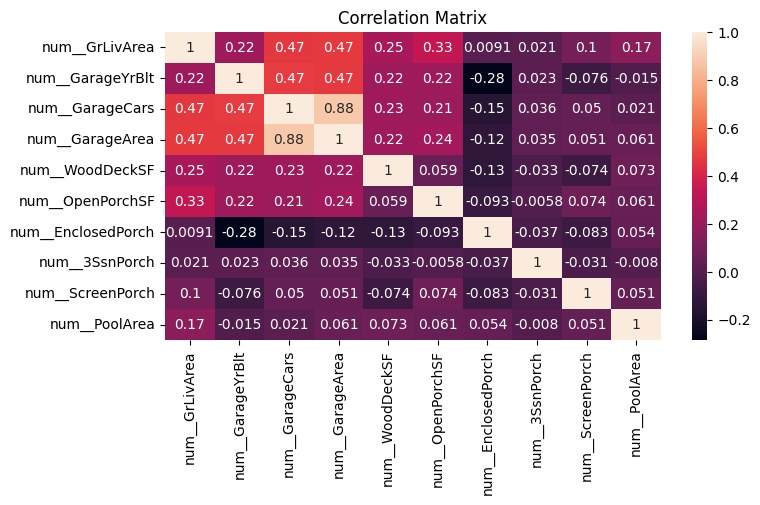

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))

sns.heatmap(corr, annot=True)


plt.title('Correlation Matrix')

In [265]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)


lasso = Lasso(alpha=0.1)  


lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [266]:
print("Intercept: ", lasso.intercept_)
print("Coefficient: ", lasso.coef_)

Intercept:  -1265455.8934392857
Coefficient:  [ 6.98752351e+01  6.45448082e+02  2.52799690e+04  2.06265865e+01
  5.55066375e+01  3.46684088e+01 -2.88738731e+01  8.03652291e+01
  9.42758070e+01 -1.30801437e+01]


In [267]:
y_pred = lasso.predict(X_test)

In [268]:
model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
model_diff.head()

,Actual value,Predicted value
892,154500.0,117568.105502
1105,325000.0,281460.140335
413,115000.0,104386.208516
522,159000.0,168455.944987
1036,315500.0,251108.603922


In [269]:
r2 = r2_score(y_test, y_pred)
print('R2 Score:', r2)

R2 Score: 0.6977090770492006


In [200]:
# Tutorial 3

import warnings
warnings.filterwarnings("ignore")

X = final_dataset.drop("num__SalePrice", axis=1)
y = final_dataset["num__SalePrice"]

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [202]:

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


kf=KFold(n_splits=5,shuffle=True, random_state=42)


lasso = Lasso()


lasso_cv=GridSearchCV(lasso, param_grid=params, cv=kf, scoring= 'neg_mean_absolute_error')
lasso_cv.fit(X, y)

print("Best Params {}".format(lasso_cv.best_params_))

Best Params {'alpha': 500}


In [204]:
names=final_dataset.drop("num__SalePrice", axis=1).columns
names.values

array(['num__Id', 'num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__BsmtUnfSF', 'num__TotalBsmtSF',
       'num__1stFlrSF', 'num__2ndFlrSF', 'num__LowQualFinSF',
       'num__GrLivArea', 'num__BsmtFullBath', 'num__BsmtHalfBath',
       'num__FullBath', 'num__HalfBath', 'num__BedroomAbvGr',
       'num__KitchenAbvGr', 'num__TotRmsAbvGrd', 'num__Fireplaces',
       'num__GarageYrBlt', 'num__GarageCars', 'num__GarageArea',
       'num__WoodDeckSF', 'num__OpenPorchSF', 'num__EnclosedPorch',
       'num__3SsnPorch', 'num__ScreenPorch', 'num__PoolArea',
       'num__MiscVal', 'num__MoSold', 'num__YrSold', 'cat__MSZoning_FV',
       'cat__MSZoning_RL', 'cat__MSZoning_RM',
       'cat__MSZoning_infrequent_sklearn', 'cat__Street_Pave',
       'cat__LotShape_IR1', 'cat__LotShape_IR2', 'cat__LotShape_Reg',
       'cat__LotShape_inf

In [205]:

lasso1 = Lasso(alpha=500)
lasso1.fit(X_train, y_train)

  
lasso1_coef = np.abs(lasso1.coef_)




In [206]:

feature_subset=np.array(names)[lasso1_coef>0.05]



In [207]:
feature_subset1=np.append(feature_subset, "num__SalePrice")
feature_subset1

array(['num__Id', 'num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__TotalBsmtSF', 'num__1stFlrSF',
       'num__2ndFlrSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__BedroomAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageYrBlt', 'num__GarageCars',
       'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch',
       'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'cat__MSZoning_RM',
       'cat__LandContour_Bnk', 'cat__LandContour_HLS',
       'cat__LotConfig_CulDSac', 'cat__Neighborhood_infrequent_sklearn',
       'cat__Condition1_Norm', 'cat__HouseStyle_1Story',
       'cat__RoofStyle_Gable', 'cat__ExterQual_TA',
       'cat__Foundation_PConc', 'cat__BsmtQual_Ex',
       'cat__BsmtExposure_Gd', 'cat__Bs

In [208]:
new_df = final_dataset[['num__Id', 'num__MSSubClass', 'num__LotFrontage', 'num__LotArea',
       'num__OverallQual', 'num__OverallCond', 'num__YearBuilt',
       'num__YearRemodAdd', 'num__MasVnrArea', 'num__BsmtFinSF1',
       'num__BsmtFinSF2', 'num__TotalBsmtSF', 'num__1stFlrSF',
       'num__2ndFlrSF', 'num__LowQualFinSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__BedroomAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageYrBlt', 'num__GarageCars',
       'num__GarageArea', 'num__WoodDeckSF', 'num__OpenPorchSF',
       'num__EnclosedPorch', 'num__3SsnPorch', 'num__ScreenPorch',
       'num__PoolArea', 'num__MiscVal', 'num__MoSold', 'cat__MSZoning_RM',
       'cat__LandContour_Bnk', 'cat__LandContour_HLS',
       'cat__LotConfig_CulDSac', 'cat__Neighborhood_infrequent_sklearn',
       'cat__Condition1_Norm', 'cat__HouseStyle_1Story',
       'cat__RoofStyle_Gable', 'cat__ExterQual_TA',
       'cat__Foundation_PConc', 'cat__BsmtQual_Ex',
       'cat__BsmtExposure_Gd', 'cat__BsmtExposure_No',
       'cat__BsmtFinType1_GLQ', 'cat__BsmtFinType1_Unf',
       'cat__HeatingQC_Ex', 'cat__KitchenQual_Ex', 'cat__KitchenQual_TA',
       'cat__Functional_Typ', 'cat__GarageType_Attchd',
       'cat__SaleCondition_Partial', 'num__SalePrice']]

In [209]:
new_df.shape

(1460, 53)

In [210]:
X = new_df.drop(['num__SalePrice'], axis =1)
y = new_df['num__SalePrice']

In [211]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [213]:
model = LinearRegression()  
model.fit(X_train, y_train)

LinearRegression()

In [214]:
print("Intercept: ", model.intercept_)
print("Coefficient: ", model.coef_)


Intercept:  -256026.48248822114
Coefficient:  [-1.28529774e+00 -1.82079329e+02 -1.30699652e+02  3.23780593e-01
  1.02923898e+04  6.09420044e+03  1.11300901e+02 -1.57681181e+01
  2.41377157e+01 -2.12675737e+00  1.27041436e+00  2.40234173e+00
  1.56685999e+01  2.81476127e+01 -8.32833658e+00  3.54878761e+01
  7.21722468e+03 -2.46479989e+03  9.45460181e+02  6.09630455e+03
  1.16504969e+01  9.71034306e+03  2.68695941e+00  1.05147229e+01
 -1.56538181e+01  8.65891891e+00  4.43301427e+01  1.27396055e+01
 -4.43205748e+01 -6.13375722e-01 -1.42935064e+02 -8.56463788e+03
 -2.14465160e+04 -1.46216115e+03  9.21981479e+03  6.51525190e+03
  1.58026552e+04  9.50891230e+03 -1.37621445e+03 -8.48984639e+03
  5.43159055e+03  2.99451908e+04  2.03609305e+04 -6.23324651e+03
  6.95777199e+03 -6.15589454e+03  3.57200278e+03  3.53196774e+04
 -2.29857103e+03  1.27131806e+04  3.60273342e+03  1.25213336e+04]


In [215]:
y_pred_model= model.predict(X_test)

In [216]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_model)
print('R2 Score:', r2)

R2 Score: 0.8700565711569391


In [217]:
print("Train Accuracy:",model.score(X_train, y_train))

Train Accuracy: 0.8542800832577322


In [218]:
print("Test Accuracy:",model.score(X_test, y_test))

Test Accuracy: 0.8700565711569391
